In [64]:
!pip install transformers

In [ ]:
from transformers import SamModel, SamProcessor
import torch

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# Load SAM model and processor
model = SamModel.from_pretrained("facebook/sam-vit-base").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")


In [ ]:
from PIL import Image

In [ ]:
img = Image.open('/content/0206.JPEG')

In [ ]:
import numpy as np

In [ ]:
img1 = Image.open('/content/0008.JPEG')
bbox2 = [88.18181818181819, 94.18181818181819, 184.6306818181818, 191.3068181818182]

In [ ]:
import math
from PIL import Image, ImageDraw

# create rectangle image
img2 = ImageDraw.Draw(img1)
print(img2)
img2.rectangle(bbox2, fill ="#ffff33", outline ="red")
img1.show()

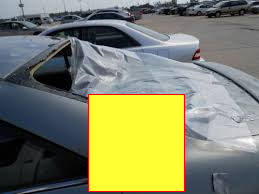

In [ ]:
img1

In [ ]:
inputs = processor(images=img, input_boxes=[[[50.0,50.0],[150.0,150.0]]], return_tensors='pt')

In [ ]:
inputs

{'pixel_values': tensor([[[[-0.5767, -0.5767, -0.6452,  ..., -1.2445, -1.2445, -1.2445],
          [-0.5767, -0.5767, -0.6452,  ..., -1.2445, -1.2445, -1.2445],
          [-0.5767, -0.5767, -0.6452,  ..., -1.2445, -1.2445, -1.2445],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 0.2402,  0.2402,  0.1527,  ..., -1.3179, -1.3179, -1.3179],
          [ 0.2402,  0.2402,  0.1527,  ..., -1.3179, -1.3179, -1.3179],
          [ 0.2402,  0.2402,  0.1352,  ..., -1.3179, -1.3179, -1.3179],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 1.3502,  1.3502,  1.2631,  ..., -1.1073, -1.1073, -1.1073],
          [ 1

In [ ]:
mask = model(**inputs)

In [ ]:
mask.pred_masks[0]

In [ ]:
pred_masks = processor.image_processor.post_process_masks(
        mask.pred_masks.cpu(), inputs["original_sizes"].to(device), inputs["reshaped_input_sizes"].to(device)
    )

In [ ]:
pred_masks

[tensor([[[[False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           ...,
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False]],
 
          [[False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           ...,
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False]],
 
          [[False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           ...,
           [False, False, False

In [ ]:
Image.fromarray(pred_masks[0][0])

In [ ]:
masks = pred_masks[0][0].squeeze(0).numpy()

In [ ]:
masks

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [ ]:
masks.shape

(3, 183, 275)

In [ ]:
a, b= img.size
print(f'(width:{a},height:{b})')

(width:275,height:183)


In [ ]:
final_mask = masks[0]

In [ ]:
final_mask.shape

(183, 275)

In [ ]:

mask_colors = np.zeros((final_mask.shape[0], final_mask.shape[1], 3), dtype=np.uint8)


In [ ]:
mask_colors

In [ ]:
mask_colors[final_mask, :] = np.array([[0, 0, 128]])

In [ ]:
mask_colors.shape

(183, 275, 3)

In [ ]:
new_img =  img+(mask_colors)

In [ ]:
op_mask = Image.fromarray(new_img)

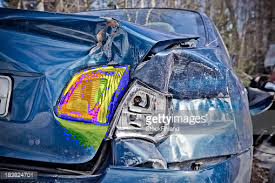

In [ ]:
op_mask

In [ ]:
op_mask = Image.fromarray(mask_colors)

In [ ]:
op_mask